In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Compute the number of months in difference for two datetime objects
def month_diff(a, b):
    '''
    Input: 
        - a: timestamp objects
        - b: timestamp objects
    Output:
        Int: Number of months in difference
    '''
    return 12 * (a.year - b.year) + (a.month - b.month)

# 1. 2. Bureau of Transportation Statistics (BTS)

In [3]:
BTS = pd.read_excel('BTS_Air_Rail_Vehicle_Miles.xls')

In [6]:
BTS.dtypes

Month             datetime64[ns]
Air RPM (000s)             int64
Rail PM                    int64
VMT (billions)           float64
dtype: object

In [10]:
BTS.head()

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,1990-01-01,35153577,454115779,163.275384
1,1990-02-01,32965187,435086002,153.254409
2,1990-03-01,39993913,568289732,178.417577
3,1990-04-01,37981886,568101697,178.680686
4,1990-05-01,38419672,539628385,188.876171


In [32]:
BTS['t'] = [month_diff(t, BTS.Month[0]) for t in BTS.Month]

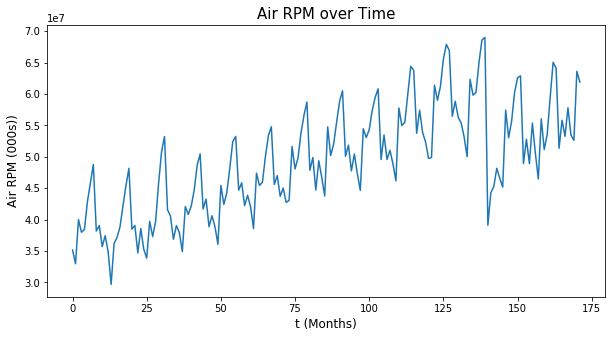

In [50]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(BTS.t, BTS.iloc[:,1])
ax.set_title('Air RPM over Time', fontsize = 15)
ax.set_xlabel('t (Months)', fontsize = 12); ax.set_ylabel('Air RPM (000s))', fontsize = 12); 

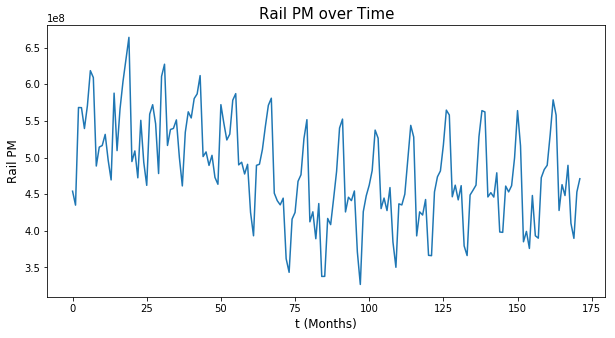

In [51]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(BTS.t, BTS.iloc[:,2])
ax.set_title('Rail PM over Time', fontsize = 15)
ax.set_xlabel('t (Months)', fontsize = 12); ax.set_ylabel('Rail PM', fontsize = 12); 

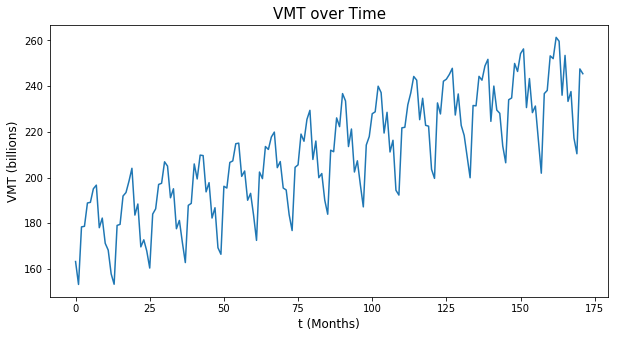

In [52]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(BTS.t, BTS.iloc[:,3])
ax.set_title('VMT over Time', fontsize = 15)
ax.set_xlabel('t (Months)', fontsize = 12); ax.set_ylabel('VMT (billions)', fontsize = 12); 

# 3. Shampoo Sale

In [44]:
shampoo = pd.read_excel('ShampooSales.xls')

In [45]:
shampoo.dtypes

Month            datetime64[ns]
Shampoo Sales           float64
dtype: object

In [47]:
shampoo.head()

,Month,Shampoo Sales
0,1995-01-01,266.0
1,1995-02-01,145.9
2,1995-03-01,183.1
3,1995-04-01,119.3
4,1995-05-01,180.3


In [48]:
shampoo['t'] = [month_diff(t, shampoo.Month[0]) for t in shampoo.Month]

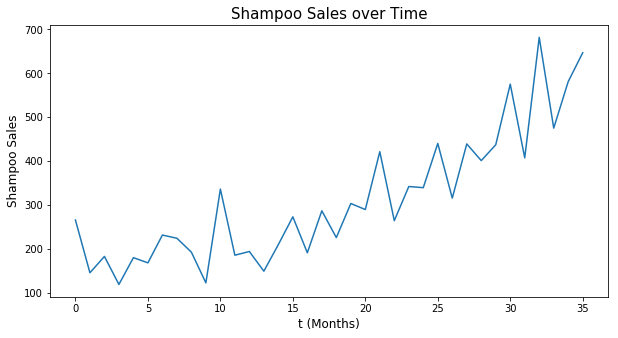

In [53]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(shampoo.t, shampoo.iloc[:,1])
ax.set_title('Shampoo Sales over Time', fontsize = 15)
ax.set_xlabel('t (Months)', fontsize = 12); ax.set_ylabel('Shampoo Sales', fontsize = 12);

# 4. Beverage Sale
## Sample Autocorrelation Function

In [103]:
beverage = pd.read_excel('Beverages_Shipment_2019.xlsx', skiprows = 3)

In [104]:
beverage.dtypes

Month                   datetime64[ns]
Dollars, in Millions             int64
dtype: object

In [105]:
beverage.head()

,Month,"Dollars, in Millions"
0,1992-01-01,3519
1,1992-02-01,3803
2,1992-03-01,4332
3,1992-04-01,4251
4,1992-05-01,4661


In [119]:
beverage['t'] = [month_diff(t, beverage.Month[0]) for t in beverage.Month]

In [106]:
def auto_cov(yt, lag):
    '''
    Compute the autocovariance given certain lag
    '''
    
    T = len(yt)
    mean = np.mean(yt)
    autocov = 0
    
    for t in np.arange(1, T-lag):
        autocov += (yt[t] - mean) * (yt[t+lag] - mean)
    
    autocov = autocov/T
    
    return autocov
        

In [132]:
def auto_corr(yt, K = None):
    '''
    Compute the autocorrelation function
    '''
    
    T = len(yt)
    if K is None:
        K = T/4
    # Round up
    if K > int(K):
        K = int(K) + 1
    
    autocor_list = []
    c0 = auto_cov(yt, lag = 0)
    
    for k in np.arange(K+1):
        autocor_list.append(auto_cov(yt, lag = k)/c0)
        
    return autocor_list
        

$c_k = \hat{\gamma_k} = \frac{1}{T} \sum_{t=1}^{T-k} (y_t - \bar{y})(y_{t+k} - \bar{y})$

$c_0 = \frac{1}{35} \sum_{t=1}^{35-0} (y_t - \bar{y})(y_{t+0} - \bar{y}) = Var(y_t) \approx $

$c_1 = \frac{1}{35} \sum_{t=1}^{35-1} (y_t - \bar{y})(y_{t+1} - \bar{y}) \approx $

In [111]:
# T
beverage.shape[0] - 1

179

In [112]:
# c0 (Variance function in numpy)
np.var(beverage.iloc[:,1])

612183.535154321

In [113]:
# c0 (Covariance function in numpy)
np.cov(beverage.iloc[:,1])

array(615603.55490379)

In [114]:
# c0
auto_cov(yt = beverage.iloc[:,1], lag = 0)

595754.4555039438

In [115]:
# c1
auto_cov(yt = beverage.iloc[:,1], lag = 1)

533577.4787856655

In [116]:
# ACF
ACF = auto_corr(yt = beverage.iloc[:,1])
ACF

[1.0,
 0.8956332157588593,
 0.8038648003815599,
 0.7032492771028038,
 0.5657227424115161,
 0.4984403056090543,
 0.47715372925402666,
 0.4600033246976522,
 0.499006858672507,
 0.5970544150956527,
 0.6662173124751137,
 0.7336315475414809,
 0.7876450914208581,
 0.7017275345101591,
 0.6174834802605921,
 0.513363217336216,
 0.38592596814601415,
 0.32000739855701466,
 0.29441875043022336,
 0.28215168304349286,
 0.31588261080792773,
 0.40365546376252376,
 0.46702748663277927,
 0.533622334387032,
 0.5820431880870733,
 0.5119904096114375,
 0.4412014793958346,
 0.3438611388258802,
 0.22933840555772286,
 0.17107000090424815,
 0.1398004215459315,
 0.12943130808254413,
 0.15656378253010417,
 0.2324813705891291,
 0.2907975351344827,
 0.3503580878803203,
 0.38907680228010244,
 0.3250875310384353,
 0.25979882110732694,
 0.17344187559679336,
 0.07305950786644617,
 0.02013606285045337,
 0.0013859916701638982,
 -0.0011792319747295126,
 0.029852497334172865,
 0.10946774355892162]

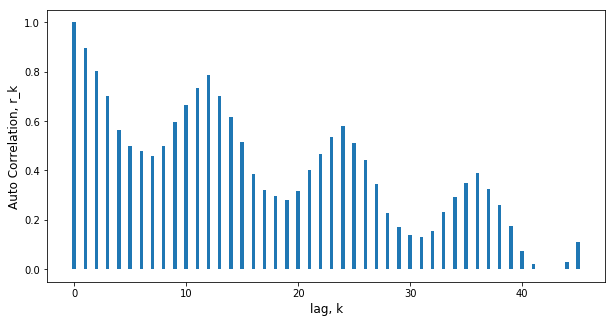

In [118]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x = np.arange(len(ACF)), height = ACF, width = 0.3)
ax.set_xlabel('lag, k', fontsize = 12); ax.set_ylabel('Auto Correlation, r_k', fontsize = 12);

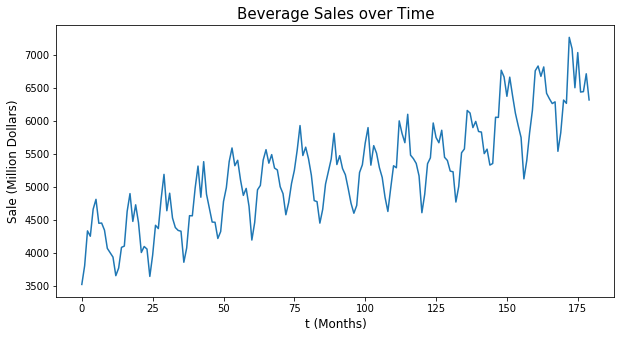

In [120]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(beverage.t, beverage.iloc[:,1])
ax.set_title('Beverage Sales over Time', fontsize = 15)
ax.set_xlabel('t (Months)', fontsize = 12); ax.set_ylabel('Sale (Million Dollars)', fontsize = 12);

## 5. U.S. Coal Production

In [121]:
coal = pd.read_excel('Coal_Production_US.xls')

In [122]:
coal.dtypes

Year                            int64
National Population             int64
National Population (1000)    float64
dtype: object

In [123]:
coal.head()

,Year,National Population,National Population (1000)
0,1900,76094000,76094.0
1,1901,77584000,77584.0
2,1902,79163000,79163.0
3,1903,80632000,80632.0
4,1904,82166000,82166.0


In [125]:
coal['t'] = [t - coal.Year[0] for t in coal.Year]

In [140]:
coal['auto_cor'] = auto_corr(yt = coal.iloc[:,2], K = coal.shape[0] - 1)

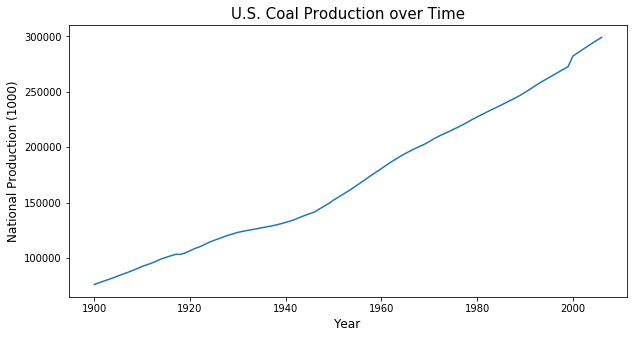

In [147]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(coal.Year, coal.iloc[:,2])
ax.set_title('U.S. Coal Production over Time', fontsize = 15)
ax.set_xlabel('Year', fontsize = 12); ax.set_ylabel('National Production (1000)', fontsize = 12);

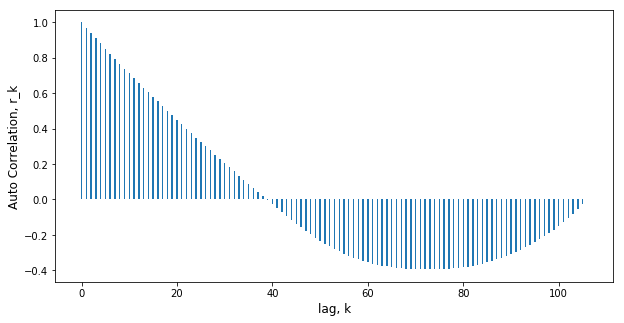

In [146]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x = np.arange(coal.shape[0]), height = coal.auto_cor, width = 0.3)
ax.set_xlabel('lag, k', fontsize = 12); ax.set_ylabel('Auto Correlation, r_k', fontsize = 12);

In [170]:
first_diff = [yt - yt_1 for yt,yt_1 in zip(coal.iloc[1:,2],coal.iloc[:-1,2])]

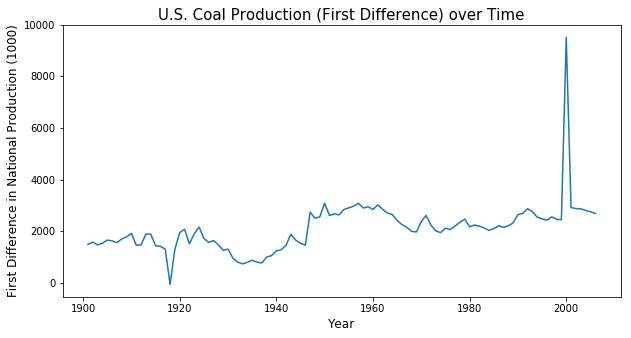

In [172]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(coal.Year[1:], first_diff)
ax.set_title('U.S. Coal Production (First Difference) over Time', fontsize = 15)
ax.set_xlabel('Year', fontsize = 12); ax.set_ylabel('First Difference in National Production (1000)', fontsize = 12);

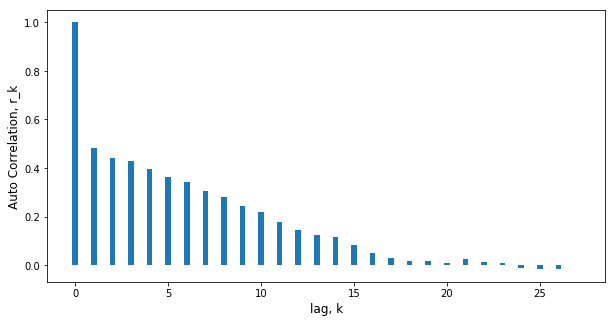

In [175]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x = np.arange(len(auto_corr(yt = first_diff))), height = auto_corr(yt = first_diff), width = 0.3)
ax.set_xlabel('lag, k', fontsize = 12); ax.set_ylabel('Auto Correlation, r_k', fontsize = 12);